## MODEL TRAINING ##

As this is a classification problem so we will be using these models : 

    KNeighborsClassifiers
    RandomForestClassifiers
    Support Vector Classifiers (SVC)
    Logistics Regression

To predict the accuracy use the accuracy score function from scikit-learn library.

1.1 Import Data and Required Packages


importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import warnings

Import Data

In [3]:
df = pd.read_csv('data/loans.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1192,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1193,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1194,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dropna(inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1192,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1193,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
1194,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)
print(df)

(505, 13)
      Loan_ID  Gender Married  Dependents     Education Self_Employed  \
1    LP001003    Male     Yes         1.0      Graduate            No   
2    LP001005    Male     Yes         0.0      Graduate           Yes   
3    LP001006    Male     Yes         0.0  Not Graduate            No   
4    LP001008    Male      No         0.0      Graduate            No   
5    LP001011    Male     Yes         2.0      Graduate           Yes   
..        ...     ...     ...         ...           ...           ...   
603  LP002978  Female      No         0.0      Graduate            No   
604  LP002979    Male     Yes         3.0      Graduate            No   
605  LP002983    Male     Yes         1.0      Graduate            No   
606  LP002984    Male     Yes         2.0      Graduate            No   
607  LP002990  Female      No         0.0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0 

In [6]:
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

In [33]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Married' variable:  ",end=" ")
print(df['Married'].unique())

print("Categories in 'Education' variable:  ",end=" ")
print(df['Education'].unique())

print("Categories in 'Self_Employed' variable:  ",end=" ")
print(df['Self_Employed'].unique())


print("Categories in 'Loan_Status' variable:  ",end=" ")
print(df['Loan_Status'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Married' variable:   ['Yes' 'No']
Categories in 'Education' variable:   ['Graduate' 'Not Graduate']
Categories in 'Self_Employed' variable:   ['No' 'Yes']
Categories in 'Loan_Status' variable:   ['N' 'Y']


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   505 non-null    object 
 1   Married                  505 non-null    object 
 2   Dependents               505 non-null    float64
 3   Education                505 non-null    object 
 4   Self_Employed            505 non-null    object 
 5   ApplicantIncome          505 non-null    int64  
 6   CoapplicantIncome        505 non-null    float64
 7   LoanAmount               505 non-null    float64
 8   Loan_Amount_Term         505 non-null    float64
 9   Credit_History           505 non-null    float64
 10  Loan_Status              505 non-null    object 
 11  Property_Area_Semiurban  505 non-null    bool   
 12  Property_Area_Urban      505 non-null    bool   
dtypes: bool(2), float64(5), int64(1), object(5)
memory usage: 48.3+ KB


In [8]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [9]:
# To find the number of columns with 
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  505 non-null    int64  
 1   Gender                   505 non-null    int64  
 2   Married                  505 non-null    int64  
 3   Dependents               505 non-null    float64
 4   Education                505 non-null    int64  
 5   Self_Employed            505 non-null    int64  
 6   ApplicantIncome          505 non-null    int64  
 7   CoapplicantIncome        505 non-null    float64
 8   LoanAmount               505 non-null    float64
 9   Loan_Amount_Term         505 non-null    float64
 10  Credit_History           505 non-null    float64
 11  Loan_Status              505 non-null    int64  
 12  Property_Area_Semiurban  505 non-null    bool   
 13  Property_Area_Urban      505 non-null    bool   
dtypes: bool(2), float64(5), int64(7

In [39]:
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1         1.0          0              0             4583   
2         1        1         0.0          0              1             3000   
3         1        1         0.0          1              0             2583   
4         1        0         0.0          0              0             6000   
5         1        1         2.0          0              1             5417   
..      ...      ...         ...        ...            ...              ...   
603       0        0         0.0          0              0             2900   
604       1        1         3.0          0              0             4106   
605       1        1         1.0          0              0             8072   
606       1        1         2.0          0              0             7583   
607       0        0         0.0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

following features have varying ranges and are not scaled:

    ApplicantIncome: e.g., values like 4583, 3000, 6000, etc.

    CoapplicantIncome: e.g., 1508.0, 0.0, 2358.0, etc.

    LoanAmount: e.g., 128.0, 66.0, 120.0, etc.

    Loan_Amount_Term: e.g., 360.0 consistently, but still a large numerical value.

In [11]:
from sklearn.preprocessing import StandardScaler

# Select columns to scale
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


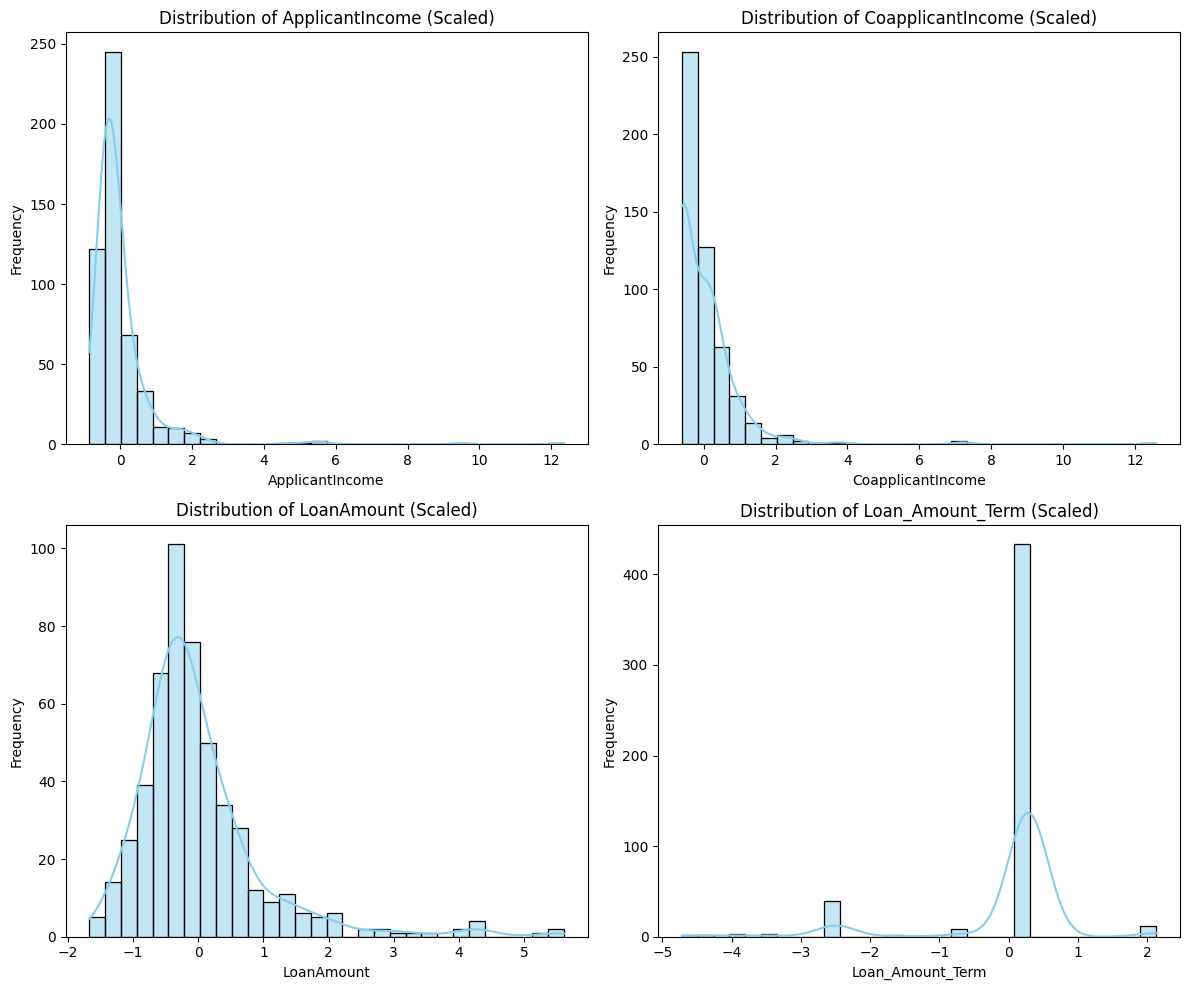

In [31]:
# List of numerical columns to scale
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Scale the features
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Plot each scaled feature separately
plt.figure(figsize=(12, 10))
for i, col in enumerate(cols_to_scale):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


One subplot per feature (ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term)

Smooth distribution curves (KDEs) overlaid on histograms

Easy way to spot skewness, spread, and outliers (all scaled around mean = 0)

In [ ]:
# Preparing X and Y variables

In [32]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [33]:
X=X.values
print(X)

[[0 1 1 ... 1.0 False False]
 [1 1 1 ... 1.0 False True]
 [2 1 1 ... 1.0 False True]
 ...
 [502 1 1 ... 1.0 False True]
 [503 1 1 ... 1.0 False True]
 [504 0 0 ... 0.0 True False]]


In [34]:
#Train-Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [35]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(353, 13) (353,)
(152, 13) (152,)


In [36]:
X.shape

(505, 13)

In [39]:
#Modeling
#lr=LogisticRegression()
#lr.fit(X_train,Y_train)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 1 to 607
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  505 non-null    int64  
 1   Gender                   505 non-null    int64  
 2   Married                  505 non-null    int64  
 3   Dependents               505 non-null    float64
 4   Education                505 non-null    int64  
 5   Self_Employed            505 non-null    int64  
 6   ApplicantIncome          505 non-null    float64
 7   CoapplicantIncome        505 non-null    float64
 8   LoanAmount               505 non-null    float64
 9   Loan_Amount_Term         505 non-null    float64
 10  Credit_History           505 non-null    float64
 11  Loan_Status              505 non-null    int64  
 12  Property_Area_Semiurban  505 non-null    bool   
 13  Property_Area_Urban      505 non-null    bool   
dtypes: bool(2), float64(6), int64(6

Predictions on unknown values

In [41]:
#Predictions
y_pred=model.predict(X_train)  #Prediction on known values
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0]


In [42]:
print(model.predict_proba(X_train))

[[0.28221893 0.71778107]
 [0.40188005 0.59811995]
 [0.35672702 0.64327298]
 [0.31815999 0.68184001]
 [0.20695862 0.79304138]
 [0.09329295 0.90670705]
 [0.18338438 0.81661562]
 [0.31610825 0.68389175]
 [0.30167378 0.69832622]
 [0.2309149  0.7690851 ]
 [0.23650473 0.76349527]
 [0.3472213  0.6527787 ]
 [0.04830245 0.95169755]
 [0.11669098 0.88330902]
 [0.0884222  0.9115778 ]
 [0.70329374 0.29670626]
 [0.72493498 0.27506502]
 [0.26035369 0.73964631]
 [0.09681729 0.90318271]
 [0.37269422 0.62730578]
 [0.15435784 0.84564216]
 [0.26627824 0.73372176]
 [0.08839496 0.91160504]
 [0.09099011 0.90900989]
 [0.26006087 0.73993913]
 [0.93336902 0.06663098]
 [0.92897724 0.07102276]
 [0.21950577 0.78049423]
 [0.14024473 0.85975527]
 [0.3136893  0.6863107 ]
 [0.27449742 0.72550258]
 [0.1720649  0.8279351 ]
 [0.39599996 0.60400004]
 [0.20505327 0.79494673]
 [0.31416851 0.68583149]
 [0.07006444 0.92993556]
 [0.11433246 0.88566754]
 [0.05976862 0.94023138]
 [0.30800535 0.69199465]
 [0.07606338 0.92393662]


In [43]:
#Confusion Metrics
from sklearn import metrics
cm=metrics.confusion_matrix(Y_train,y_pred)
print(cm)
print("Train Accuracy:",metrics.accuracy_score(Y_train,y_pred))
print(metrics.classification_report(Y_train,y_pred))

[[ 42  62]
 [  4 245]]
Train Accuracy: 0.8130311614730878
              precision    recall  f1-score   support

           0       0.91      0.40      0.56       104
           1       0.80      0.98      0.88       249

    accuracy                           0.81       353
   macro avg       0.86      0.69      0.72       353
weighted avg       0.83      0.81      0.79       353



In [44]:
y_pred=model.predict(X_test)  #Predicction on unknown values
print(y_pred)
cm=metrics.confusion_matrix(Y_test,y_pred)
print(cm)
print("Train Accuracy:",metrics.accuracy_score(Y_test,y_pred))
print(metrics.classification_report(Y_test,y_pred))

[1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1]
[[ 23  25]
 [  3 101]]
Train Accuracy: 0.8157894736842105
              precision    recall  f1-score   support

           0       0.88      0.48      0.62        48
           1       0.80      0.97      0.88       104

    accuracy                           0.82       152
   macro avg       0.84      0.73      0.75       152
weighted avg       0.83      0.82      0.80       152



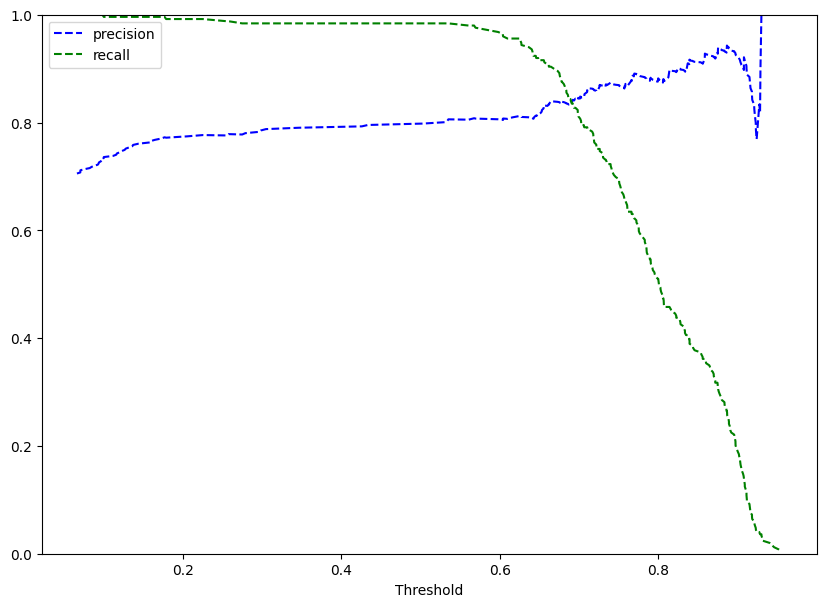

In [45]:
y_scores_lr = model.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lr, recalls_lr, thresholds_lr = metrics.precision_recall_curve(Y_train, y_scores_lr[:, 1])#Only for positive class

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

This graph shows the trade-off b/w precision & recall. 


As recall increases,precision generally decreases. 


Closer the curve is to the top-right corner, the better the model's performance , indicating high precision and high recall.

# Let’s import RandomForestClassifier and fit the data.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=3,
                                       n_estimators=100, oob_score=True,min_samples_leaf=10)

In [48]:
%%time
classifier_rf.fit(X_train, Y_train)

CPU times: user 731 ms, sys: 57.6 ms, total: 788 ms
Wall time: 739 ms


RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_jobs=-1,
                       oob_score=True, random_state=42)

In [49]:
# checking the oob score
classifier_rf.oob_score_

0.8130311614730878

In [50]:
from sklearn import metrics
y_pred=classifier_rf.predict(X_train)
print("Train Accuracy:",metrics.accuracy_score(y_pred,Y_train))

Train Accuracy: 0.8101983002832861


In [51]:
y_pred=classifier_rf.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_pred,Y_test))

Test Accuracy: 0.8157894736842105


As this is a classification problem so we will be using these models : 

    KNeighborsClassifiers
    RandomForestClassifiers
    Support Vector Classifiers (SVC)
    Logistics Regression

To predict the accuracy use the accuracy score function from scikit-learn library.

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 97.73371104815864
Accuracy score of  KNeighborsClassifier = 82.15297450424929
Accuracy score of  SVC = 70.53824362606233
Accuracy score of  LogisticRegression = 81.30311614730878


/home/disha-soni/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 77.63157894736842
Accuracy score of  KNeighborsClassifier = 67.10526315789474
Accuracy score of  SVC = 68.42105263157895
Accuracy score of  LogisticRegression = 80.92105263157895


/home/disha-soni/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Predicted')

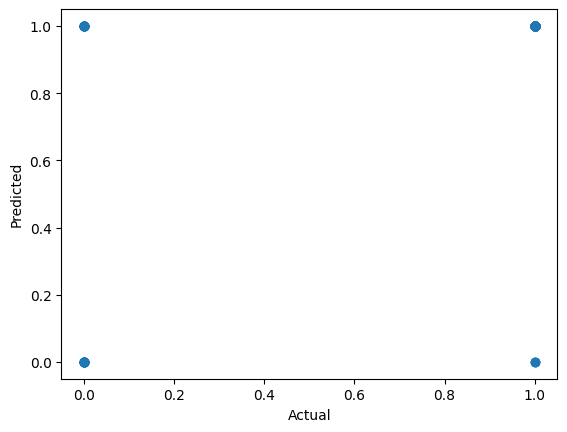

In [55]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [56]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
119,1,1,0
130,1,0,1
576,1,1,0
416,0,0,0
479,1,1,0
...,...,...,...
281,1,1,0
402,0,0,0
6,1,1,0
180,0,1,-1
